In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import kendalltau

In [4]:
images = []
for i in range(10):
    img = plt.imread(f'images/c_{i}.png')
    img[img != 0] = 1.
    images.append(img)
    
h, w = images[0].shape

In [10]:
def get_indenpendence(img1, img2):
    e1 = (img1 == 1).astype('float')
    e2 = (img1 == 0).astype('float')
    f1 = (img2 == 1).astype('float')
    f2 = (img2 == 0).astype('float')
    c1 = -1*np.linalg.norm(e1)**2/np.linalg.norm(e2)**2
    c2 = -1*np.linalg.norm(f1)**2/np.linalg.norm(f2)**2
    g1 = e1 + c1*e2
    g2 = f1 + c2*f2
    g1 = g1 / np.linalg.norm(g1)
    g2 = g2 / np.linalg.norm(g2)
    return 1 - np.sum(g1*g2)

In [11]:
matrixes = np.load('matr8.npy')
matrixes.shape

(9, 10, 10)

In [12]:
sigmas = [0, 0.05, 0.1, 0.3, 0.5, 1, 2, 3, 5]

In [13]:
inds = dict()
for first in range(0, 10):
    for second in range(first+1, 10):
        inds[str(first) + '-' + str(second)] = get_indenpendence(images[first], images[second])

In [107]:
sorted_inds = dict(sorted(inds.items(), key=lambda x: x[1]))
sorted_inds

{'0-8': 0.3134587903334234,
 '8-9': 0.4453104295166792,
 '0-9': 0.45938014852845366,
 '2-8': 0.46237770449136095,
 '0-2': 0.47910264717824536,
 '2-3': 0.5481707447095752,
 '1-8': 0.5528450051990508,
 '0-6': 0.556216791214713,
 '0-3': 0.5574491409756548,
 '3-8': 0.5781668999852111,
 '7-8': 0.585617776732669,
 '5-9': 0.5915408721223732,
 '5-8': 0.5927844192954046,
 '0-5': 0.6159231775207006,
 '2-4': 0.6224663663356951,
 '1-7': 0.6389222218965749,
 '6-8': 0.6394803512430993,
 '4-7': 0.6439876735765608,
 '3-7': 0.6617387291693464,
 '0-7': 0.6644641268897569,
 '6-9': 0.6662430839166489,
 '0-4': 0.6761601512163398,
 '0-1': 0.6772203510653033,
 '2-5': 0.6785698552199138,
 '7-9': 0.6786565023504665,
 '3-4': 0.6822461493784844,
 '1-3': 0.6827394759074674,
 '2-7': 0.6851012865193196,
 '1-9': 0.6892348221916249,
 '6-7': 0.6940001327135499,
 '1-5': 0.7053757707547081,
 '2-9': 0.7069384976866366,
 '4-8': 0.719229546637177,
 '1-6': 0.7282184193364593,
 '3-9': 0.7346014273692097,
 '4-9': 0.7456733615

In [15]:
def get_kendall(inds, matrix):
    x = list()
    y = list()
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if i == j:
                continue
            x.append(matrix[i, j]/100)
            tmp = str(i) + "-" + str(j) if i < j else str(j) + "-" + str(i)
            y.append(inds[tmp])
    return kendalltau(x,y)

In [17]:
freqs = (matrixes[5]+matrixes[5].transpose())/200
freqs_d = dict()
for first in range(0, 10):
    for second in range(first+1, 10):
        freqs_d[str(first) + '-' + str(second)] = freqs[first, second]

In [18]:
freqs_d = dict(sorted(freqs_d.items(), key=lambda x: x[1]))
freqs_d

{'0-2': 0.0,
 '0-3': 0.0,
 '0-4': 0.0,
 '0-7': 0.0,
 '1-4': 0.0,
 '1-5': 0.0,
 '1-6': 0.0,
 '1-7': 0.0,
 '1-9': 0.0,
 '2-3': 0.0,
 '2-4': 0.0,
 '3-4': 0.0,
 '3-6': 0.0,
 '3-7': 0.0,
 '3-8': 0.0,
 '4-5': 0.0,
 '4-6': 0.0,
 '4-7': 0.0,
 '4-8': 0.0,
 '4-9': 0.0,
 '5-6': 0.0,
 '5-7': 0.0,
 '5-8': 0.0,
 '5-9': 0.0,
 '6-7': 0.0,
 '6-8': 0.0,
 '6-9': 0.0,
 '7-8': 0.0,
 '7-9': 0.0,
 '0-8': 0.005,
 '3-9': 0.005,
 '3-5': 0.01,
 '2-7': 0.025,
 '8-9': 0.03,
 '2-8': 0.035,
 '0-1': 0.055,
 '0-6': 0.06,
 '2-6': 0.06,
 '0-5': 0.07,
 '1-8': 0.07,
 '2-9': 0.1,
 '1-3': 0.14,
 '1-2': 0.235,
 '0-9': 0.335,
 '2-5': 0.415}

In [19]:
ks = list()
ps = list()
for i, sigma in enumerate(sigmas):
    t, p = get_kendall(inds, matrixes[i])
    ks.append(t)
    ps.append(p)
    

In [20]:
ks

[nan,
 nan,
 nan,
 nan,
 -0.04057472170769479,
 -0.07093158015160302,
 -0.09683069612535691,
 -0.05925552920099219,
 -0.08061273761401841]

In [21]:
ps

[nan,
 nan,
 nan,
 nan,
 0.6392147535721453,
 0.3986801327326551,
 0.2375374421408314,
 0.46665399597024604,
 0.320453307167894]

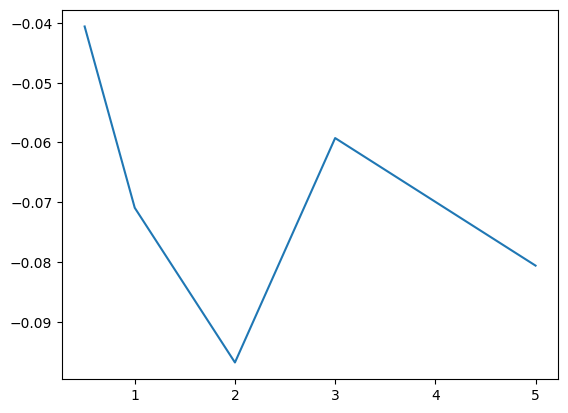

In [22]:
plt.plot(sigmas[4:], ks[4:])